In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as  pd
import seaborn as sns

# EDA

In [2]:
#load data
df =pd.read_csv("../input/heart.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
#detect outlier (maximum heart rate = 220 - age)
max_thalach = 220 - 29
df['thalach'].loc[df['thalach'] > max_thalach]

72     202
103    194
125    192
248    195
Name: thalach, dtype: int64

In [6]:
#drop outlier
df.drop([72,103,125,248],inplace=True)

In [7]:
df.reset_index(inplace=True)
df.drop(['index'],axis = 1,inplace=True)

In [8]:
target = df['target']
df= df.drop(['target'],axis=1)

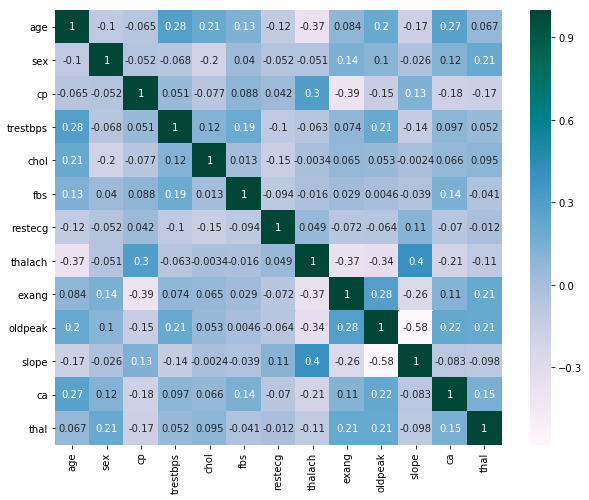

In [9]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,cmap="PuBuGn",annot=True)

In [10]:
#normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = np.array(df)
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
new_df = scaler.transform(X)

# Split data(train/test)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_df, target, test_size = 0.3)
train, _ = X_train.shape 
test,  _ = X_test.shape 
print (train, test)

209 90


In [13]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# kNN Classifier

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print(classification_report(y_test,knn.predict(X_test)))


              precision    recall  f1-score   support

           0       0.92      0.73      0.81        45
           1       0.78      0.93      0.85        45

   micro avg       0.83      0.83      0.83        90
   macro avg       0.85      0.83      0.83        90
weighted avg       0.85      0.83      0.83        90



# SVM

In [15]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)
print(classification_report(y_test,clf.predict(X_test)))


              precision    recall  f1-score   support

           0       0.92      0.76      0.83        45
           1       0.79      0.93      0.86        45

   micro avg       0.84      0.84      0.84        90
   macro avg       0.86      0.84      0.84        90
weighted avg       0.86      0.84      0.84        90



# Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
logcl= LogisticRegression(penalty='l2')
logcl.fit(X_train, y_train)
print(classification_report(y_test,logcl.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80        45
           1       0.76      0.93      0.84        45

   micro avg       0.82      0.82      0.82        90
   macro avg       0.84      0.82      0.82        90
weighted avg       0.84      0.82      0.82        90



# XGB Classifier

In [17]:
import xgboost as xgb
from xgboost import XGBClassifier
model = XGBClassifier()
model=XGBClassifier(learning_rate=0.1,n_estimators=100)
model.fit(X_train, y_train)
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78        45
           1       0.77      0.82      0.80        45

   micro avg       0.79      0.79      0.79        90
   macro avg       0.79      0.79      0.79        90
weighted avg       0.79      0.79      0.79        90



# RandomForest Classifier

In [18]:
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV 
rf = ensemble.RandomForestClassifier()
rf.fit(X_train, y_train)
print(classification_report(y_test,rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.71      0.78        45
           1       0.75      0.89      0.82        45

   micro avg       0.80      0.80      0.80        90
   macro avg       0.81      0.80      0.80        90
weighted avg       0.81      0.80      0.80        90



# Feature importances

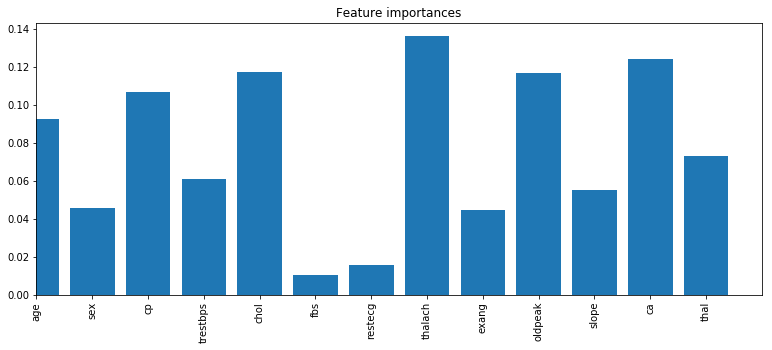

In [19]:
importances = rf.feature_importances_
importances
plt.figure(figsize=(13, 5))
feature_names = df.columns
plt.title("Feature importances")
plt.bar(range(13), importances, align='center')
plt.xticks(range(13), np.array(feature_names), rotation=90)
plt.xlim([0, 13]);